# Image classification using convolutional neural network (CNN) - MNIST

The MNIST (Modified National Institute of Standards and Technology database) dataset is a large dataset of handwritten digits commonly used in the field of machine learning. It consists of 60,000 training images and 10,000 test images. The images in the set are 28x28 pixels. A full description of the dataset can be found [here](https://en.wikipedia.org/wiki/MNIST_database).

One of the main advantages of convolutional neural networks (CNNs) is that they usually have fewer parameters that need to be learned. The main purpose of this notebook is:
- illustrate the use of a neural network for an image classification task.


In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Conv2D, Dense, Dropout, Input
from keras.layers import MaxPooling2D, Flatten
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import sys


## Loading training and test sets

In [ ]:
#Loading the data using keras utility
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Printing the shape of the train and test sets
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Showing the training set

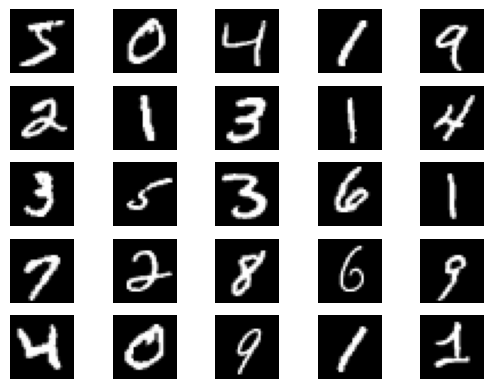

In [ ]:
#Displaying a few samples of the train set
fig, ax = plt.subplots(nrows=5, ncols=5)
counter = 0
for row in ax:
    for col in row:
        col.imshow(x_train[counter], cmap = 'gray')
        col.axis("off")
        counter+=1
plt.show()

## Showing the testing set

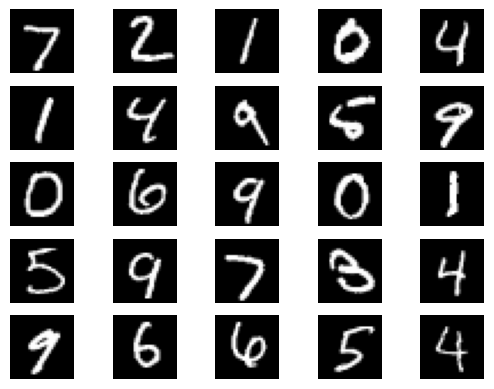

In [ ]:
#Displaying a few samples of the test set
fig, ax = plt.subplots(nrows=5, ncols=5)
counter = 0
for row in ax:
    for col in row:
        col.imshow(x_test[counter], cmap = 'gray')
        col.axis("off")
        counter+=1
plt.show()

## Normalizing data

In [ ]:
#Setting training parameters
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
    
#Normalizing data between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# One hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

*1. Just like in the previous Notebook, we have the reshape function in this section of code. But here it is being used with other parameters. What's the difference and why?*

ANSWER:

## Defining CNN

In [ ]:
def my_model(input_shape):
    input_signal = Input(input_shape)
    conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu',
                 input_shape=input_shape)(input_signal)
    conv2 = Conv2D(64,kernel_size=(3,3),activation="relu")(conv1)
    pool1 = MaxPooling2D(pool_size=(2,2))(conv2)
    drop1 = Dropout(0.25)(pool1)
    flat1 = Flatten()(drop1)
    prediction = Dense(10,activation = 'softmax')(flat1)
    model = Model(inputs=input_signal, outputs=prediction)
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    return model

*2. What type of model (network) is being built in this case: conventional neural network or convolutional neural network? How did you arrive at this conclusion? How many layers does it have and what is each of them for?*

ANSWER:

## Model summary

In [ ]:
#Building the model and showing a summary
model = my_model(input_shape)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                           

*3(a). Try to understand the dimensions of the output of each layer of the network. For example, why does the first layer output with dimensions (None, 28, 28, 1) and the second layer (None, 26, 26, 32)?*

ANSWER:

*3(b). What about the parameters to be learned, can you explain how they are calculated? Compared to the network in NB Ex05a, does this network have more or fewer parameters to be trained?*

ANSWER:

## Training the model

In [ ]:
# Checkpoint callback to save model after each improvement along the epochs
checkpoint = ModelCheckpoint('mnist_keras_cnn.model', monitor='val_loss'
                             ,verbose=0,save_weights_only= True,
                             save_best_only=True)

#Training the model
print(x_train.shape)
print(y_train.shape)
epochs = 4
model_history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split= 0.2,callbacks = [checkpoint])

(60000, 28, 28, 1)
(60000, 10)
Epoch 1/4


AttributeError: ignored

## Training and validation curves

In [ ]:
model_history.history

{'loss': [2.293278932571411,
  2.258287191390991,
  2.2180519104003906,
  2.1686840057373047],
 'accuracy': [0.12566666305065155,
  0.20999999344348907,
  0.3329583406448364,
  0.4569166600704193],
 'val_loss': [2.2744131088256836,
  2.2362570762634277,
  2.190431594848633,
  2.1329214572906494],
 'val_accuracy': [0.16216666996479034,
  0.2925833463668823,
  0.4791666567325592,
  0.6099166870117188]}

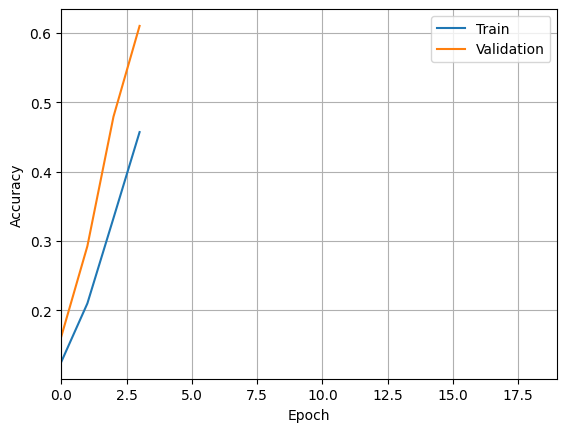

In [ ]:
#Plot accuracy history
plt.plot(model_history.history['accuracy'], label = "Train")
plt.plot(model_history.history['val_accuracy'],label = "Validation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.xlim(0,19)
plt.grid()
plt.show()

## Loading the best model and evaluating on the test set

In [ ]:
#Load the best_model during training
best_model = my_model(input_shape)
best_model.load_weights('mnist_keras_cnn.model')

#Evaluate the model on the test set
score = best_model.evaluate(x_test, y_test, verbose=0)
print('Test loss: %f' %score[0])
print('Test accuracy: %f' %score[1])

Test loss: 2.135091
Test accuracy: 0.599500


## Showing some prediction errors

313/313 [==============================] - 1s 2ms/step


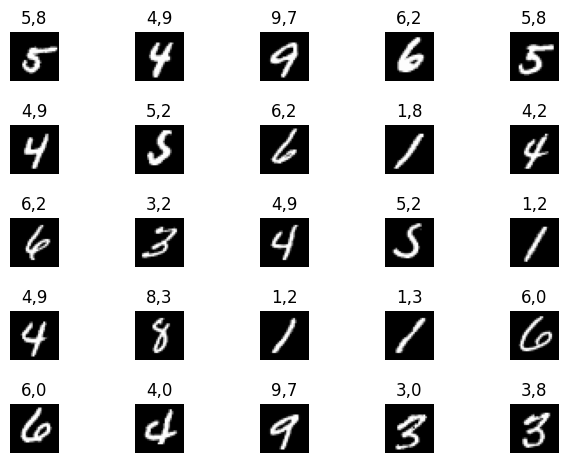

In [ ]:
# Run predicition
ypred = best_model.predict(x_test).argmax(axis = 1)
y_test2 = y_test.argmax(axis = 1)

# See samples where prediction failed
indexes = np.where(ypred!=y_test2)[0][::-1]

#Display some of the errors
x_test2 = x_test.reshape(-1,28,28)
fig, ax = plt.subplots(nrows=5, ncols=5)
plt.tight_layout()
counter = 0
for row in ax:
    for col in row:
        aux = indexes[counter]
        col.imshow(x_test2[aux], cmap = 'gray')
        col.axis("off")
        col.set_title("%d,%d" %(y_test2[aux],ypred[aux]))
        counter+=1
plt.show()

## Activity suggestion (optional)

- Try to improve the model output on the test set by increasing the number of training epochs. Use the Colab GPU and monitor the loss curve to ensure there is no overfitting.

# References

- [MNIST Database](https://en.wikipedia.org/wiki/MNIST_database).